In [2]:
from scipy.stats import bernoulli, binom
from matplotlib.pyplot import bar, show, hist, grid, legend, xticks

In [13]:
#problema 1a
#p = probabilitatea spre un nod din dreapta
#nr_pasi = numarul de pasi

def simulate(p, nr_pasi):
  poz_vizitate = [0]
  for _ in range(nr_pasi):
    poz_vizitate.append(poz_vizitate[-1] + 2 * bernoulli.rvs(p) - 1)
  return poz_vizitate

In [60]:
simulate(0.9, 10)

[0, 1, 2, 1, 2, 3, 2, 3, 4, 5, 6]

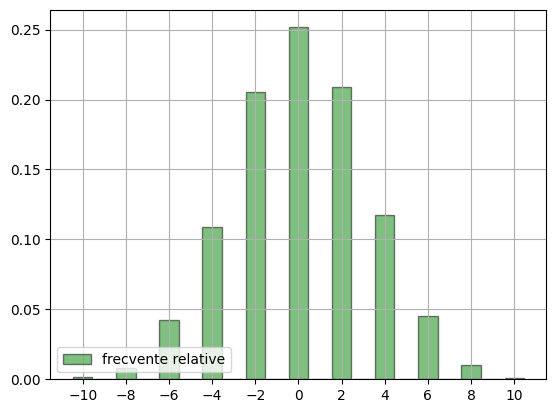

In [71]:
#problema 2b
nr_pasi  = 10
p = 0.5
N = 3000

data = [simulate(p, nr_pasi)[-1] for _ in range(N)]
#pozitiile finale din N = 1000 de simularii

bin_edges = [k+0.5 for k in range(-nr_pasi - 1, nr_pasi + 1)]
hist(data, bin_edges, density = True, rwidth = 0.9, color = 'green', edgecolor = 'black',
alpha = 0.5, label = 'frecvente relative')
distribution = dict([(i,1/6) for i in range(1,7)])
legend(loc = 'lower left')
xticks(range(-nr_pasi, nr_pasi + 1, 2))
grid()
show()

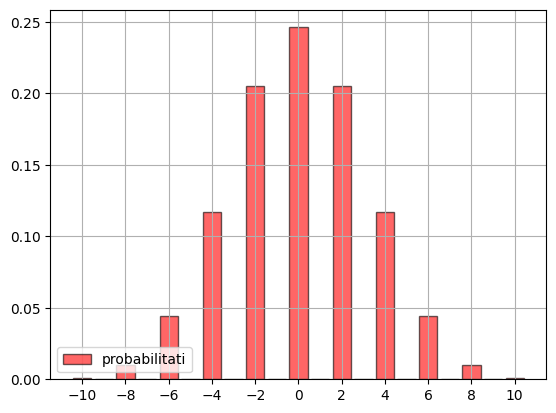

In [70]:
#problema 2b
#probabilitatea teoretica
nr_pasi  = 10
p = 0.5
N = 3000

data = [simulate(p, nr_pasi)[-1] for _ in range(N)]
#pozitiile finale din N = 1000 de simularii

bin_edges = [k+0.5 for k in range(-nr_pasi - 1, nr_pasi + 1)]
#hist(data, bin_edges, density = True, rwidth = 0.9, color = 'green', edgecolor = 'black',
#alpha = 0.5, label = 'frecvente relative')
distribution = dict([(k,binom.pmf((nr_pasi+k)/2, n = nr_pasi, p = p)) for k in range(-nr_pasi,nr_pasi + 1)])
bar(distribution.keys(), distribution.values(), width = 0.85, color = 'red', edgecolor = 'black',
alpha= 0.6, label = 'probabilitati')
legend(loc = 'lower left')
xticks(range(-nr_pasi, nr_pasi + 1, 2))
grid()
show()

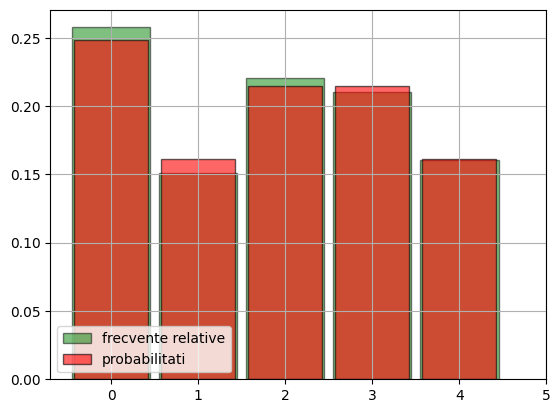

In [84]:
#problema 1c
nr_pasi  = 10
p = 0.5
N = 3000
n = 5 #numarul de noduri in cerc

data = [simulate(p, nr_pasi)[-1]%n for _ in range(N)]
#pozitiile finale din N = 1000 de simularii

bin_edges = [k+0.5 for k in range(-1, n)]
hist(data, bin_edges, density = True, rwidth = 0.9, color = 'green', edgecolor = 'black',
alpha = 0.5, label = 'frecvente relative')

distribution_axa = dict([(k,binom.pmf((nr_pasi+k)/2, n = nr_pasi, p = p)) for k in range(-nr_pasi,nr_pasi + 1)])
distribution_cerc = dict([(k, 0) for k in range(n)])
for k in distribution_axa.keys():
  distribution_cerc[k%n] += distribution_axa[k]

bar(distribution_cerc.keys(), distribution_cerc.values(), width = 0.85, color = 'red', edgecolor = 'black',
alpha= 0.6, label = 'probabilitati')

legend(loc = 'lower left')
xticks(range(0, n + 1))
grid()
show()

In [85]:
from scipy.stats import hypergeom, geom

In [88]:
#problema 2i)
p = sum(hypergeom.pmf(k, 49, 6, 6) for k in [3, 4, 5, 6])
print(p)

p = 1 - hypergeom.cdf(2, 49, 6, 6)
print(p)
#probabilitatea cel putin 3 bile albe din 6 extrageri dintr-o urna cu 43
#negre + 6 albe, fara repunere => distributie hipergeometrica

0.018637545002022343
0.018637545002022304


In [105]:
geom.rvs(p, size= 10)

array([215,  37,  10,  11,  41,  50,  63,   1,  30, 118])